In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import pearsonr

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Utilization.csv')

In [3]:
df.dropna(subset=['NPI', 'Count'], inplace=True)
df['Provider Last Name'] = df['Provider Last Name'].str.lower()
df['Provider First Name'] = df['Provider First Name'].str.lower()
df['Procedure_Category'] = df['Procedure_Category'].str.lower()

df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

df.dropna(subset=['Count'], inplace=True)

df['Count'] = df['Count'].astype(int)

In [4]:
mean_count = df['Count'].mean()
median_count = df['Count'].median()
std_count = df['Count'].std()

print(f"Mean Procedural Count: {mean_count}")
print(f"Median Procedural Count: {median_count}")
print(f"Standard Deviation of Procedural Count: {std_count}")

Mean Procedural Count: 119.69468811781559
Median Procedural Count: 50.0
Standard Deviation of Procedural Count: 202.74625868964918


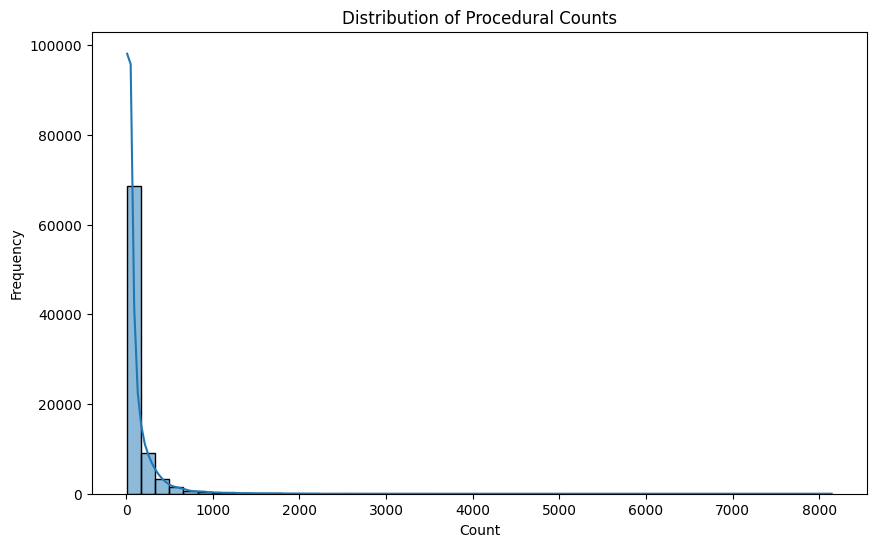

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Count'], bins=50, kde=True)
plt.title('Distribution of Procedural Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.savefig('Distribution_of_Procedural_Counts.png')
plt.show()

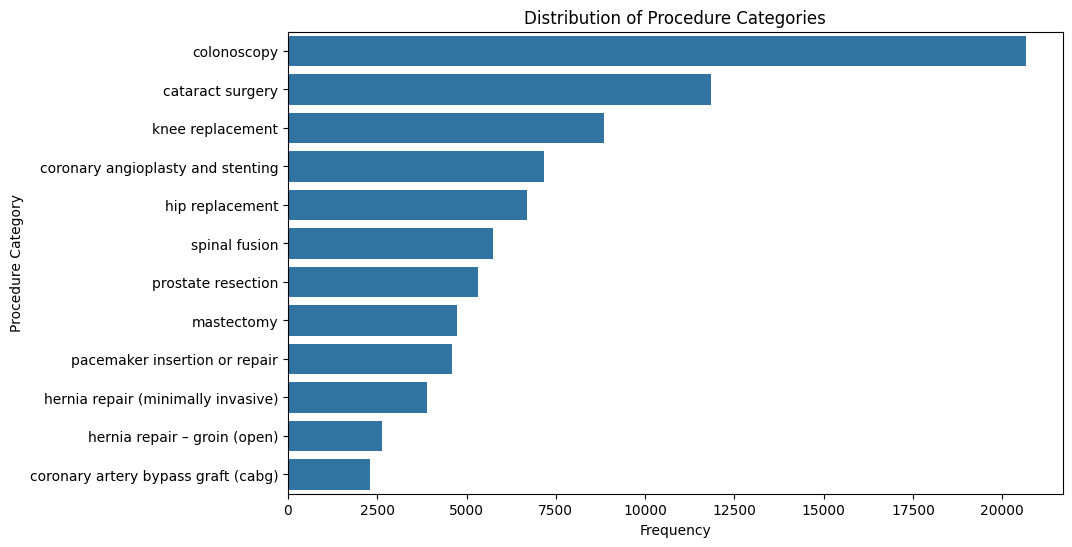

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Procedure_Category', data=df, order=df['Procedure_Category'].value_counts().index)
plt.title('Distribution of Procedure Categories')
plt.xlabel('Frequency')
plt.ylabel('Procedure Category')
plt.savefig('Distribution_of_Procedure_Categories.png')
plt.show()

In [7]:
correlation, p_value = pearsonr(df['Count'], df['Percentile'])
print(f"Correlation between Count and Percentile: {correlation}, p-value: {p_value}")

Correlation between Count and Percentile: 0.3970445744447283, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


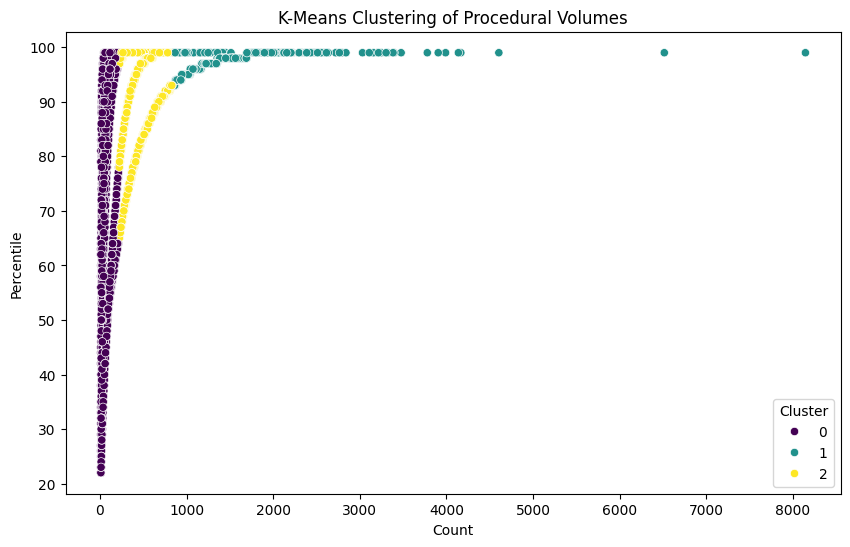

In [8]:
X = df[['Count', 'Percentile']]
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Count', y='Percentile', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Procedural Volumes')
plt.xlabel('Count')
plt.ylabel('Percentile')
plt.legend(title='Cluster')
plt.savefig('K-Means_Clustering_of_Procedural_Volumes.png')
plt.show()

In [9]:
X = df[['Count', 'Percentile']]
y = df['Profile_Display_Indicator'].apply(lambda x: 1 if x == 'Y' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Logistic Regression Accuracy: 0.9978691920686593
Confusion Matrix:
[[    0    36]
 [    0 16859]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       1.00      1.00      1.00     16859

    accuracy                           1.00     16895
   macro avg       0.50      0.50      0.50     16895
weighted avg       1.00      1.00      1.00     16895



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
